In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import RandomizedSearchCV
!pip install joblib -q
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
use_cols=['DestAirportSeqID', 'DestStateFips', 'CRSElapsedTime', 'Distance','OriginAirportSeqID',
          'Reporting_Airline_AA', 'Reporting_Airline_AS', 'Reporting_Airline_B6', 'Reporting_Airline_CO', 'Reporting_Airline_DL',
          'Reporting_Airline_F9', 'Reporting_Airline_FL', 'Reporting_Airline_MQ', 'Reporting_Airline_NK', 'Reporting_Airline_UA',
          'Reporting_Airline_US', 'Reporting_Airline_VX', 'mfr_AIRBUS', 'mfr_BOEING', 'engine_type_Reciprocating',
          'engine_type_Turbofan', 'engine_type_Turbojet', 'w_type_9', 'w_type_C', 'w_type_N', 'w_type_V',
          'sky_c_det_9', 'sky_c_det_C', 'sky_c_det_M', 'sky_c_det_W', 'sky_cov_00', 'sky_cov_02', 'sky_cov_04',
          'sky_cov_07', 'sky_cov_08', 'sky_cov_09', 'sky_cov_10', 'sky_obs_tot_cov_00',
          'sky_obs_tot_cov_01', 'sky_obs_tot_cov_02', 'sky_obs_tot_cov_04', 'sky_obs_tot_cov_06', 'sky_obs_tot_cov_07',
          'sky_obs_tot_cov_08', 'sky_obs_tot_cov_09', 'w_type_d_9', 'w_type_d_C', 'w_type_d_N', 'w_type_d_V',
          'sky_c_det_d_9', 'sky_c_det_d_C', 'sky_c_det_d_M','sky_c_det_d_W', 'sky_cov_d_00', 'sky_cov_d_02', 'sky_cov_d_04',
          'sky_cov_d_07', 'sky_cov_d_08', 'sky_cov_d_09',
          'sky_cov_d_10', 'sky_obs_tot_cov_d_00', 'sky_obs_tot_cov_d_01', 'sky_obs_tot_cov_d_02',
          'sky_obs_tot_cov_d_03', 'sky_obs_tot_cov_d_04', 'sky_obs_tot_cov_d_06', 'sky_obs_tot_cov_d_07', 'sky_obs_tot_cov_d_08',
          'sky_obs_tot_cov_d_09', 'CRSDepHour', 'passengers', 'no_engines', 'w_dir_angle',
          'w_speed_rate', 'sky_c_hgt', 'vis_dist', 'tmp_air', 'tmp_dew', 'sea_lvl_p', 'liq_precip_qty', 'liq_precip_dim',
          'liq_precip_cond', 'sky_cov_base_hgt', 'sky_cov_cld', 'sky_sum_cov', 'sky_sum_hgt', 'sky_low_cld_base_hgt',
          'at_pres_altimeter_rate', 'at_pres_stn_rate', 'w_dir_angle_d', 'w_speed_rate_d', 'sky_c_hgt_d', 'vis_dist_d',
          'tmp_air_d', 'tmp_dew_d', 'sea_lvl_p_d', 'liq_precip_qty_d', 'liq_precip_dim_d', 'liq_precip_cond_d',
          'sky_cov_base_hgt_d', 'sky_cov_cld_d', 'sky_sum_cov_d', 'sky_sum_hgt_d', 'sky_low_cld_base_hgt_d',
          'at_pres_altimeter_rate_d', 'at_pres_stn_rate_d']

# removed from use_cols 'Weather_Label', 'Year',

features_to_scale = ['CRSElapsedTime', 'Distance', 'passengers', 'OriginAirportSeqID','DestAirportSeqID',
               'w_dir_angle','w_speed_rate','sky_c_hgt','vis_dist','tmp_air','tmp_dew',
              'sea_lvl_p','liq_precip_qty','liq_precip_dim','sky_cov_base_hgt','sky_cov_cld','sky_sum_cov','sky_sum_hgt',
              'sky_low_cld_base_hgt','at_pres_altimeter_rate','at_pres_stn_rate','w_dir_angle_d',
              'w_speed_rate_d','sky_c_hgt_d','vis_dist_d','tmp_air_d','tmp_dew_d',
              'sea_lvl_p_d','liq_precip_qty_d','liq_precip_dim_d','liq_precip_cond_d','sky_cov_base_hgt_d',
              'sky_cov_cld_d', 'sky_sum_cov_d','sky_sum_hgt_d','sky_low_cld_base_hgt_d','at_pres_altimeter_rate_d',
              'at_pres_stn_rate_d']
# removed 'Year' from here as well

In [ ]:
len(use_cols)

106

## Downsampled Modeling

In [ ]:
# df_dev = pd.read_parquet('/content/drive/Shareddrives/STUDENT-Capstone SS23/BTS_data/OnTime_WithWeather/X_dev.parquet')
# df_train = pd.read_parquet(r'/content/drive/Shareddrives/STUDENT-Capstone SS23/BTS_data/OnTime_WithWeather/X_train.parquet')
# df_all=pd.concat([df_dev,df_train])
# df_all = pd.read_parquet('/content/drive/Shareddrives/STUDENT-Capstone SS23/BTS_data/OnTime_WithWeather/Training_set.parquet')
# df_all
print(df_dev.shape,df_train.shape)
X_train=pd.read_parquet(r'/content/drive/Shareddrives/STUDENT-Capstone SS23/BTS_data/OnTime_WithWeather/X.parquet')
X_train.shape

(5223, 116) (26112, 117)


(26112, 117)

In [ ]:
X_train.rename(columns={'DayofMonth':'Day'},inplace=True)
X_train['Date']=pd.to_datetime(X_train[['Year', 'Month', 'Day']])
X_train.drop(['Month', 'Day','Quarter','DayOfWeek','Year'], axis=1,inplace=True)

In [ ]:
X_train.shape

(26112, 113)

In [ ]:
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Create a ColumnTransformer to apply the transformer to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, features_to_scale)
    ],verbose_feature_names_out=False).set_output(transform='pandas')

# Fit and transform the data using the preprocessor
X_train[features_to_scale] = preprocessor.fit_transform(X_train[features_to_scale])

In [ ]:
joblib.dump(preprocessor, files['Models']['pipe']) # save out the preprocessor
preprocessor=joblib.load(files['Models']['pipe']) # load the saved preprocessor

,CRSElapsedTime,Distance,passengers,OriginAirportSeqID,DestAirportSeqID,w_dir_angle,w_speed_rate,sky_c_hgt,vis_dist,tmp_air,...,liq_precip_qty_d,liq_precip_dim_d,liq_precip_cond_d,sky_cov_base_hgt_d,sky_cov_cld_d,sky_sum_cov_d,sky_sum_hgt_d,sky_low_cld_base_hgt_d,at_pres_altimeter_rate_d,at_pres_stn_rate_d
95718,-0.149473,-0.165600,-0.304513,-0.393869,0.599971,-0.237283,1.788313,1.059282,0.103985,0.255130,...,-0.208017,-0.093776,0.336029,-0.431837,0.130888,-0.596842,-0.428277,-0.941779,-0.095426,-0.055806
265012,-1.336111,-1.289578,-0.304513,-1.130069,1.072296,0.025959,-0.281601,1.059282,0.093797,1.250605,...,-0.208017,-0.093776,0.336029,2.042751,0.130888,2.761214,2.056389,1.009942,-0.019791,-0.041803
139061,-0.070363,0.091598,-0.304513,-1.130069,1.461833,0.508568,-1.225773,1.059282,0.103985,-0.680616,...,-0.208017,-0.093776,0.336029,-0.543291,0.130888,-0.596842,-0.540186,1.009942,-0.099240,-0.010048
281619,1.179562,1.108242,-0.475216,1.814730,1.204030,-0.544399,-1.225773,1.059282,0.103985,0.474135,...,2.079070,-0.093776,0.336029,2.042751,0.130888,-1.016599,2.056389,1.009942,-0.056655,0.001589
267188,-1.257001,-1.289578,-0.304513,-0.393869,1.072308,-0.193410,1.425170,-0.913674,0.093797,1.141103,...,-0.208017,-0.093776,0.336029,-0.352797,0.130888,0.242672,-0.348915,1.009942,-0.019791,-0.041803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171399,0.119499,0.105775,3.229051,0.342331,-1.202187,-0.412778,-1.007887,1.059282,0.103985,0.752868,...,-0.208017,-0.093776,0.336029,2.042751,0.130888,-1.016599,2.056389,1.009942,-0.067460,-0.054031
242982,0.072033,-0.165600,-0.304513,0.342331,0.599977,-0.325030,-0.644744,1.059282,0.103985,0.922098,...,-0.208017,-0.093776,0.336029,-0.499026,0.130888,-0.596842,-0.495740,-0.994771,-0.013435,-0.030955
200465,-0.307691,-0.246608,-0.304513,-1.130069,-0.398022,-0.456651,1.388856,-1.164353,0.093797,-0.352110,...,-0.208017,-0.093776,0.336029,-0.447655,0.130888,0.662429,-0.444160,1.009942,0.014531,-0.031152
222161,-0.861455,-0.914919,-0.304513,-0.393869,0.169655,-0.281157,1.788313,-1.186527,0.103985,-0.790119,...,-0.208017,-0.093776,0.336029,-0.543291,0.130888,-0.596842,-0.540186,-1.029684,-0.047757,-0.017148


In [ ]:
# X_train[features_to_scale]
# preprocessor.fit_transform(X)

In [ ]:
print(df_train.shape)
X=X_train[use_cols]
y=X_train.Weather_Label
print(y.shape)
X.head()

(26112, 117)
(26112,)


,DestAirportSeqID,DestStateFips,CRSElapsedTime,Distance,OriginAirportSeqID,Reporting_Airline_AA,Reporting_Airline_AS,Reporting_Airline_B6,Reporting_Airline_CO,Reporting_Airline_DL,...,liq_precip_qty_d,liq_precip_dim_d,liq_precip_cond_d,sky_cov_base_hgt_d,sky_cov_cld_d,sky_sum_cov_d,sky_sum_hgt_d,sky_low_cld_base_hgt_d,at_pres_altimeter_rate_d,at_pres_stn_rate_d
95718,0.599971,17,-0.149473,-0.165600,-0.393869,1.0,0.0,0.0,0.0,0.0,...,-0.208017,-0.093776,0.336029,-0.431837,0.130888,-0.596842,-0.428277,-0.941779,-0.095426,-0.055806
265012,1.072296,48,-1.336111,-1.289578,-1.130069,1.0,0.0,0.0,0.0,0.0,...,-0.208017,-0.093776,0.336029,2.042751,0.130888,2.761214,2.056389,1.009942,-0.019791,-0.041803
139061,1.461833,12,-0.070363,0.091598,-1.130069,1.0,0.0,0.0,0.0,0.0,...,-0.208017,-0.093776,0.336029,-0.543291,0.130888,-0.596842,-0.540186,1.009942,-0.099240,-0.010048
281619,1.204030,6,1.179562,1.108242,1.814730,1.0,0.0,0.0,0.0,0.0,...,2.079070,-0.093776,0.336029,2.042751,0.130888,-1.016599,2.056389,1.009942,-0.056655,0.001589
267188,1.072308,48,-1.257001,-1.289578,-0.393869,1.0,0.0,0.0,0.0,0.0,...,-0.208017,-0.093776,0.336029,-0.352797,0.130888,0.242672,-0.348915,1.009942,-0.019791,-0.041803


model tuning

In [ ]:
model = GradientBoostingClassifier(random_state=42)

# grid parameters
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001, 0.005,],
    'n_estimators': [100, 200, 300,500],
    'max_depth': [3, 5, 7, 9, 11,15],
    'max_features':['sqrt','log2',None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# grid search set up
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
# grid_search.fit(X_dev, y_dev.values.ravel())

random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring='f1', random_state=42)
random_search.fit(X, y.values.ravel(),sample_weight=X_train.weights.values.ravel())

# best hyperparameter performance
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
print('with sample weight')

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 11, 'learning_rate': 0.1}
Best Score: 0.7530245327753156
with sample weight


In [ ]:
model=GradientBoostingClassifier(random_state=42,n_estimators= 300, min_samples_split= 10, min_samples_leaf=4, max_features='sqrt',max_depth= 11, learning_rate= 0.1)
model.fit(X, y.values.ravel(),sample_weight=X_train.weights.values.ravel())

GradientBoostingClassifier(max_depth=11, max_features='sqrt',
                           min_samples_leaf=4, min_samples_split=10,
                           n_estimators=300, random_state=42)

In [ ]:
files = json.load(open('/content/drive/Shareddrives/STUDENT-Capstone SS23/files.json','r'))
# files['Models']

{'pipe': '/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/PreProcessor.pkl',
 'LR': '/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/LR_trained_model.pkl',
 'GB': '/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/GB_model.pkl',
 'RF': '/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/RF_trained_model.pkl',
 'NN_mod': '/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/best_model.h5',
 'NN_pipe': '/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/nn_pipeline.pkl',
 'NN_PyFile': '/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/NN_model.py'}

In [ ]:
# saving the model
joblib.dump(model, '/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/GB_model.pkl')

['/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/GB_model.pkl']

In [ ]:
feature_importance = model.feature_importances_

feature_names = list(X_train.columns)

feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the dictionary by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature_name, importance in sorted_features:
    print(f"Feature {feature_name}: Importance = {importance}")

In [ ]:
model=GradientBoostingClassifier(random_state=42,n_estimators= 200, min_samples_split= 2, min_samples_leaf=2, max_features='log2',max_depth= 9, learning_rate= 0.1)
model.fit(X_train.iloc[:,:-2], y_train.values.ravel())

how to decide which threshold is optimizing both precision and recall

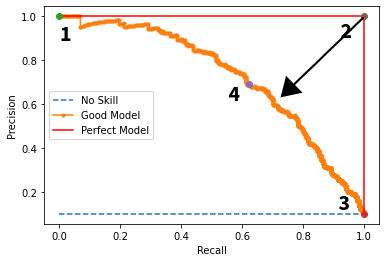

adjusted threshold that produces higher F1 score while optimizing for recall

In [ ]:
y_pred_prob = model.predict_proba(X_test[final_cols[:-1]])

# custom threshold
threshold = 0.3

y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

accuracy_score(y_test, y_pred)
# evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# metrics table
table = PrettyTable()
table.field_names = ["Metric", "Score"]

table.add_row(["Accuracy", accuracy])
table.add_row(["Precision", precision])
table.add_row(["Recall", recall])
table.add_row(["F1 Score", f1])
print(table)

model performance for unadjusted threshold

In [ ]:
# test_df=pd.read_parquet('/content/drive/Shareddrives/STUDENT-Capstone SS23/BTS_data/OnTime_WithWeather/Test_set.parquet')
# test_df[final_cols[:-1]]
# test_y_df=
test_df['Weather_Label']

In [ ]:
y_pred_prob = model.predict_proba(test_df[final_cols[:-1]])

# custom threshold
threshold = 0.3

y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

accuracy_score(test_df['Weather_Label'], y_pred)
# evaluation metrics
accuracy = accuracy_score(test_df['Weather_Label'], y_pred)
precision = precision_score(test_df['Weather_Label'], y_pred)
recall = recall_score(test_df['Weather_Label'], y_pred)
f1 = f1_score(test_df['Weather_Label'], y_pred)

# metrics table
table = PrettyTable()
table.field_names = ["Metric", "Score"]

table.add_row(["Accuracy", accuracy])
table.add_row(["Precision", precision])
table.add_row(["Recall", recall])
table.add_row(["F1 Score", f1])
print(table)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# metrics table
table = PrettyTable()
table.field_names = ["Metric", "Score"]

table.add_row(["Accuracy", accuracy])
table.add_row(["Precision", precision])
table.add_row(["Recall", recall])
table.add_row(["F1 Score", f1])

# Print the table
print(f'max depth = 5 \n {table}')


## Full Dataset Modeling

In [ ]:
# not downsampled
df_all=pd.read_parquet(r'/content/drive/Shareddrives/STUDENT-Capstone SS23/BTS_data/OnTime_WithWeather/Training_set.parquet')
df_all.shape

(293172, 116)

In [ ]:
df_all.rename(columns={'DayofMonth':'Day'},inplace=True)
df_all['Date']=pd.to_datetime(df_all[['Year', 'Month', 'Day']])
df_all.drop(['Month', 'Day','Quarter','DayOfWeek'], axis=1,inplace=True)

df_train=df_all.query('Year!=2019')
df_test=df_all.query('Year==2019')
X_train=df_train[use_cols]
X_train.drop(columns='Year',inplace=True)
y_train=df_train[['Weather_Label']]
X_test=df_test[use_cols]
X_test.drop(columns='Year',inplace=True)
y_test=df_test[['Weather_Label']]

print(X_train.shape)
print(X_train.columns)

In [ ]:
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Create a ColumnTransformer to apply the transformer to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, features_to_scale)
    ])

# Fit and transform the data using the preprocessor
X_train[features_to_scale] = preprocessor.fit_transform(X_train)
X_test[features_to_scale] = preprocessor.transform(X_test)

In [ ]:
model = GradientBoostingClassifier(random_state=42,learning_rate=0.1,n_estimators=300,max_depth=7)
model.fit(X_train, y_train.values.ravel())

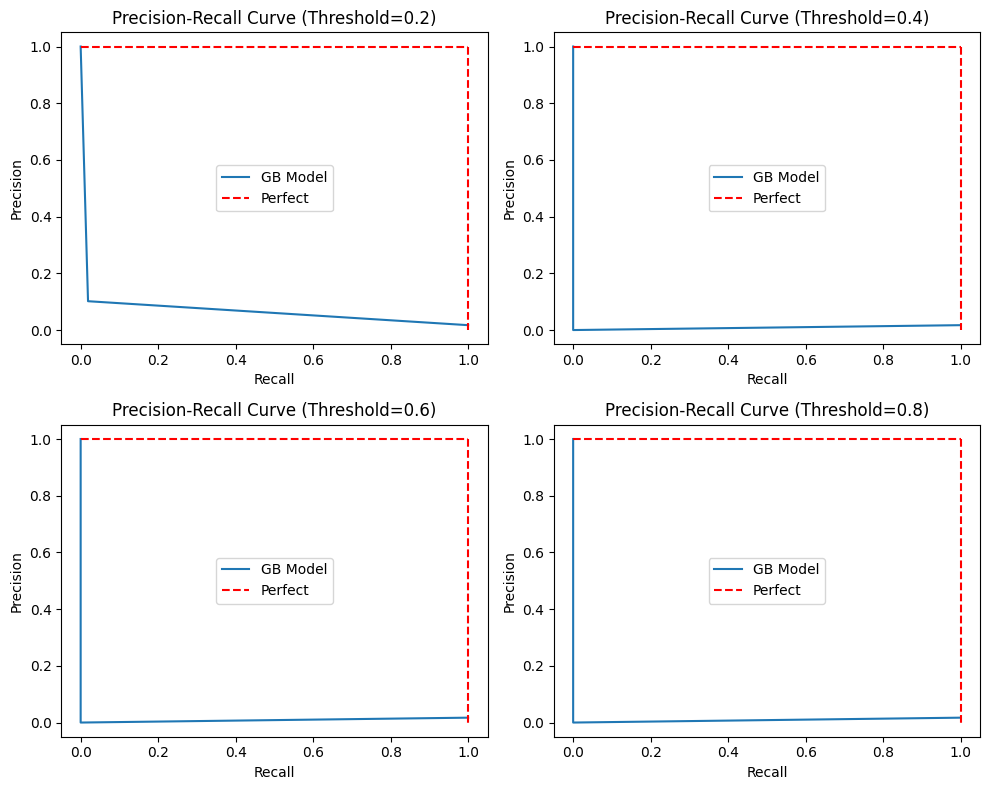

In [ ]:
thresholds = [0.2, 0.4, 0.6, 0.8]

# Create subplots for precision-recall curves
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


# Plot precision-recall curves for different thresholds
for i, threshold in enumerate(thresholds):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    y_scores = model.predict_proba(X_test)[:, 1] >= threshold
    precision, recall, threashold = precision_recall_curve(y_test, y_scores)
    ax.plot(recall, precision, label='GB Model')
    x1 = [0, 1]
    y1 = [1, 1]
    ax.plot(x1, y1, linestyle='--', color='red', label='Perfect' )
    x2 = [1, 1]
    y2 = [1, 0]
    ax.plot(x2, y2, linestyle='--', color='red')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve (Threshold={threshold})')
    ax.legend()

plt.tight_layout()
plt.show()

adjusted threshold that produces higher F1 score while optimizing for recall

In [ ]:
y_pred_prob = model.predict_proba(X_test)

# Set a lower threshold
threshold = 0.1

# Adjust the predictions based on the threshold
y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

accuracy_score(y_test, y_pred)
# Calculate evaluation metrics with the adjusted predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

table = PrettyTable()
table.field_names = ["Metric", "Score"]

# Add rows to the table
table.add_row(["Accuracy", accuracy])
table.add_row(["Precision", precision])
table.add_row(["Recall", recall])
table.add_row(["F1 Score", f1])
print(table)

+-----------+---------------------+
|   Metric  |        Score        |
+-----------+---------------------+
|  Accuracy |  0.9778372181887658 |
| Precision | 0.15789473684210525 |
|   Recall  | 0.06666666666666667 |
|  F1 Score | 0.09375000000000001 |
+-----------+---------------------+


model performance for unadjusted

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a table
table = PrettyTable()
table.field_names = ["Metric", "Score"]

# Add rows to the table
table.add_row(["Accuracy", accuracy])
table.add_row(["Precision", precision])
table.add_row(["Recall", recall])
table.add_row(["F1 Score", f1])

# Print the table
print(f'max depth = 5 \n {table}')


max depth = 5 
 +-----------+--------------------+
|   Metric  |       Score        |
+-----------+--------------------+
|  Accuracy | 0.9811670942737049 |
| Precision |        0.0         |
|   Recall  |        0.0         |
|  F1 Score |        0.0         |
+-----------+--------------------+


In [ ]:
# saving the model
!pip install joblib -q
import joblib
joblib.dump(model, '/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/GB_FullSet_trained_model.pkl')

['/content/drive/Shareddrives/STUDENT-Capstone SS23/Models/GB_FullSet_trained_model.pkl']